# Araña en un frisbee

[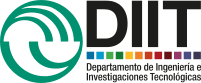](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
Un frisbee tiene su masa $M$ distribuida en forma uniforme en su radio $R$.
Mientras gira manteniendo su horizontalidad una araña que estaba originalmente en su centro camina en dirección radial a velocidad constante $v_a$.  
1. Escribir la expresión velocidad y aceleración de la araña consideradas desde un sistema de coordenas fijas al suelo.  
1. ¿Cuál es la $\omega$ del frisbee respecto a la original cuando la araña esté a una distancia $d$ de su centro?  
1. ¿Qué torque debiera ejercerse al frisbee si se quisiera que su $\omega$ fuera constante?  
¿Qué fuerza de _coriolis_ siente la araña en tal caso?  
![](figuras/arañaFrisbee.png "Sistemas de coordenadas para la araña en el frisbee")

## 1. Velocidad y aceleración de la araña

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

### Marcos de referencia

Establezco un sistema de referencia _suelo_ y otro llamado _frisbee_ referido a este último.

In [2]:
suelo = mech.ReferenceFrame('o') # sistema de referencia orientado con el suelo
phi = mech.dynamicsymbols('varphi')
frisbee = suelo.orientnew('f', 'Axis', (phi, suelo.z),
                         indices=('i','j','k')
                         ) # marco referencial rotado en phi respecto a suelo

### Vectores posición

El vector posición del frisbee respecto al sistema fijo al suelo

In [3]:
x_f, y_f = mech.dynamicsymbols('x_f, y_f')
r_f_o = x_f* suelo.x + y_f* suelo.y # vector posición del frisbee
r_f_o

El de la araña respecto al frisbee

In [4]:
rho = mech.dynamicsymbols('rho')
r_a_f = rho* frisbee.x
r_a_f

Y el de la araña respecto al sistema suelo se obtiene de sumar estos dos

In [5]:
r_a_o = r_f_o + r_a_f
r_a_o

### Velocidad

La velocidad $\vec{v}_{a/o}$ de la araña respecto al suelo se obtiene de diferenciar este último respecto al tiempo en el sistema fijo al suelo
$$
\vec{v}_{a/o} = \frac{\mathrm{d}}{\mathrm{d}t} \vec{r}_{a/o}
$$

Vamos a realizar esto en dos pasos, primero calculamos la velocidad del frisbee en el marco referencial _suelo_.

In [6]:
t = sym.Symbol('t')
r_f_o.diff(t, suelo) # se diferencia respecto al sistema fijo al suelo

Y por otro lado la de la araña sobre el frisbee calculada en el sistema fijo al suelo.

In [7]:
r_a_f.diff(t, suelo)

Que resulta más legible si se lo expresa en el sistema de referencia fijo al frisbee.

In [8]:
r_a_f.diff(t, suelo).express(frisbee).simplify()

Entonces se expresa la velocidad de la araña respecto al suelo como la del frisbee más la velocidad de la araña respecto al frisbee.

In [10]:
v_a_o = r_f_o.diff(t, suelo) + r_a_f.diff(t, suelo).express(frisbee).simplify()
v_a_o

### Aceleración

En forma análoga se obtiene la aceleración de la araña respecto al suelo
$$
\vec{a}_{a/o}
= \frac{\mathrm{d}}{\mathrm{d}t}\left( \vec{v}_{a/o} \right)
$$

Por un lado la aceleración del frisbee.

In [12]:
r_f_o.diff(t, suelo).diff(t, suelo)

Y por el otro el de la araña en el frisbee respecto al suelo.

In [13]:
r_a_f.diff(t, suelo).diff(t, suelo).express(frisbee).simplify()

In [14]:
a_a_o = r_f_o.diff(t, suelo).diff(t, suelo) + r_a_f.diff(t, suelo).diff(t, suelo).express(frisbee).simplify()
a_a_o

En la dirección radial $\hat{i}$ están los términos de aceleración
- lineal $\ddot{\rho}$ en la dirección radial
- centrípeta $- \rho \dot{\varphi}^2$

En la dirección transversal $\hat{j}$ están los términos de aceleración
- Euleriana $\rho \ddot{\varphi}$
- de Coriolis $2 \dot{\rho} \dot{\varphi}$

## 2. $\omega$ frisbee cuando araña está a $d$ de su centro